# Connect to the pipeline

In [6]:
import os
os.chdir('../..')

## Requirements before beginning: 

* dj_local_conf.json: edited with appropriate information
* `datajoint` package installed

In [7]:
import datajoint as dj
dj.conn()

DataJoint connection (disconnected) rcadmin@sabatini-dj-prd01.cluster-cjvmzxer50q5.us-east-1.rds.amazonaws.com:3306

## Connect to the SabatiniLab DataJoint Pipeline using virtual modules

In [8]:
db_prefix = dj.config['custom']['database.prefix']

subject = dj.VirtualModule('subject', db_prefix + "subject")
session = dj.VirtualModule('session', db_prefix + "session")
photometry = dj.VirtualModule('photometry', db_prefix + "photometry")
probe = dj.VirtualModule('probe', db_prefix + "probe")
ephys = dj.VirtualModule('ephys', db_prefix + "ephys")
ephys_report = dj.VirtualModule('ephys_report', db_prefix + "ephys_report")
scan = dj.VirtualModule('scan', db_prefix + "scan")
imaging = dj.VirtualModule('imaging', db_prefix + "imaging")
trial = dj.VirtualModule('trial', db_prefix + "trial")
event = dj.VirtualModule('event', db_prefix + "event")
model = dj.VirtualModule('event', db_prefix + "model")


[2023-10-17 14:30:51,924][WARNING]: MySQL server has gone away. Reconnecting to the server.


In [13]:
# Full pipeline
(dj.Diagram(subject) 
 + dj.Diagram(session) + dj.Diagram(photometry)
 + dj.Diagram(event) + dj.Diagram(trial)
 + dj.Diagram(probe) + dj.Diagram(ephys)
 + dj.Diagram(scan) + dj.Diagram(imaging)
 + dj.Diagram(model)
 )

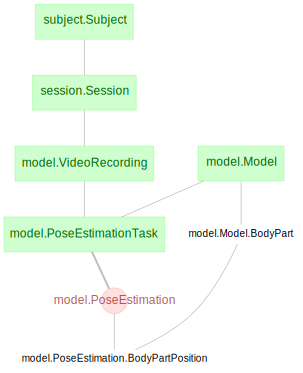

In [12]:
(dj.Diagram(subject.Subject) 
 + dj.Diagram(session.Session)
 + (dj.Diagram(event.BehaviorRecording) + 2)
 + (dj.Diagram(photometry.FiberPhotometry) + 2)
 + dj.Diagram(probe.Probe) + (dj.Diagram(ephys.EphysRecording) + 2)
 + (dj.Diagram(ephys.CuratedClustering) + 2) - dj.Diagram(ephys_report)
 + dj.Diagram(scan.ScanInfo) + (dj.Diagram(imaging.ProcessingTask) + 2) + (dj.Diagram(imaging.Activity) + 2)
 + dj.Diagram(model.Model) + (dj.Diagram(model.PoseEstimationTask) + 2)
 )

## Let's browse for data in this pipeline

In [22]:
session.Session()

subject,session_id,session_datetime
O2Test,1,2021-10-07 12:00:00
T429,230720,2023-07-20 00:00:00
WS1,1,2023-10-10 12:00:00
WS10,1,2023-10-01 12:00:00
WS2,1,2023-10-01 12:00:00
WS3,1,2023-10-02 12:00:00
WS4,1,2023-10-05 12:00:00
WS5,1,2023-10-10 12:00:00
WS6,1,2023-10-11 12:00:00
WS7,1,2023-10-01 12:00:00


In [24]:
trial.Trial()

subject,session_id,trial_id trial number (1-based indexing),trial_type,trial_start_time (second) relative to recording start,trial_stop_time (second) relative to recording start
O2Test,1,1,None,0.0,0.0
O2Test,1,2,None,0.972,2.916
O2Test,1,3,None,15.39,18.9
O2Test,1,4,None,20.79,22.194
O2Test,1,5,None,24.624,28.026
O2Test,1,6,None,29.214,33.426
O2Test,1,7,None,36.774,40.176
O2Test,1,8,None,57.132,60.156
O2Test,1,9,None,71.01,74.088
O2Test,1,10,None,75.168,76.356


In [23]:
photometry.FiberPhotometry()

subject,session_id,light_source_name,raw_sample_rate sample rate of the raw data (in Hz),beh_synch_signal signal for behavioral synchronization from raw data
WS1,1,Plexon LED,2000.0,=BLOB=
WS10,1,Plexon LED,2000.0,=BLOB=
WS2,1,Plexon LED,2000.0,=BLOB=
WS3,1,Plexon LED,2000.0,=BLOB=
WS4,1,Plexon LED,2000.0,=BLOB=
WS5,1,Plexon LED,2000.0,=BLOB=
WS6,1,Plexon LED,2000.0,=BLOB=
WS7,1,Plexon LED,2000.0,=BLOB=
WS8,1,Plexon LED,2000.0,=BLOB=
WS9,1,Plexon LED,2000.0,=BLOB=


In [55]:
session_key = {'subject': "WS10", "session_id": 1}

In [56]:
trial.Trial & session_key

subject,session_id,trial_id trial number (1-based indexing),trial_type,trial_start_time (second) relative to recording start,trial_stop_time (second) relative to recording start
WS10,1,1,None,0.0,0.0
WS10,1,2,None,0.972,2.916
WS10,1,3,None,15.39,18.9
WS10,1,4,None,20.79,22.194
WS10,1,5,None,24.624,28.026
WS10,1,6,None,29.214,33.426
WS10,1,7,None,36.774,40.176
WS10,1,8,None,57.132,60.156
WS10,1,9,None,71.01,74.088
WS10,1,10,None,75.168,76.356


In [57]:
trial.TrialEvent & session_key

subject,session_id,trial_id trial number (1-based indexing),event_type,event_start_time (second) relative to recording start
WS10,1,2,centerport,0.972
WS10,1,3,centerport,15.39
WS10,1,4,centerport,20.79
WS10,1,5,centerport,24.624
WS10,1,6,centerport,29.214
WS10,1,7,centerport,36.774
WS10,1,8,centerport,42.606
WS10,1,8,centerport,42.768
WS10,1,8,centerport,43.092
WS10,1,8,centerport,43.2


#### We can now begin to fetch the data to view it. We'll start by first looking at the demodulated traces.

In [58]:
#Fetch one fiber
fiber_id = 1
photometry.FiberPhotometry.DemodulatedTrace & session_key & f"fiber_id = '{fiber_id}'"

subject,session_id,fiber_id,hemisphere,"trace_name (e.g., raw, detrend)",emission_color,"sensor_protein_name (e.g., GCaMP, dLight, etc)",excitation_wavelength (nm),carrier_frequency,demod_sample_rate sample rate of the demodulated data (in Hz),trace demodulated photometry traces
WS10,1,1,right,carrier,green,dLight1.1,465,167,167.0,=BLOB=
WS10,1,1,right,carrier,red,redGRABDA,560,223,223.0,=BLOB=
WS10,1,1,right,photom,green,dLight1.1,465,167,167.0,=BLOB=
WS10,1,1,right,photom,red,redGRABDA,560,223,223.0,=BLOB=


In [59]:
photometry.FiberPhotometry.DemodulatedTrace & session_key

subject,session_id,fiber_id,hemisphere,"trace_name (e.g., raw, detrend)",emission_color,"sensor_protein_name (e.g., GCaMP, dLight, etc)",excitation_wavelength (nm),carrier_frequency,demod_sample_rate sample rate of the demodulated data (in Hz),trace demodulated photometry traces
WS10,1,1,right,carrier,green,dLight1.1,465,167,167.0,=BLOB=
WS10,1,1,right,carrier,red,redGRABDA,560,223,223.0,=BLOB=
WS10,1,1,right,photom,green,dLight1.1,465,167,167.0,=BLOB=
WS10,1,1,right,photom,red,redGRABDA,560,223,223.0,=BLOB=
WS10,1,2,left,carrier,green,dLight1.1,465,167,167.0,=BLOB=
WS10,1,2,left,carrier,red,redGRABDA,560,223,223.0,=BLOB=
WS10,1,2,left,photom,green,dLight1.1,465,167,167.0,=BLOB=
WS10,1,2,left,photom,red,redGRABDA,560,223,223.0,=BLOB=


In [60]:
# Fetch photometry trace
trace_name = "photom"
emission_color = "red"
hemisphere = "right"

restr = {
         "trace_name": trace_name, 
         "emission_color": emission_color,
         "hemisphere": hemisphere
         }
query = photometry.FiberPhotometry.DemodulatedTrace() & session_key & restr
trace = query.fetch1("trace")
query

subject,session_id,fiber_id,hemisphere,"trace_name (e.g., raw, detrend)",emission_color,"sensor_protein_name (e.g., GCaMP, dLight, etc)",excitation_wavelength (nm),carrier_frequency,demod_sample_rate sample rate of the demodulated data (in Hz),trace demodulated photometry traces
WS10,1,1,right,photom,red,redGRABDA,560,223,223.0,=BLOB=


In [61]:
# import libraries for plotting
import seaborn as sns
import matplotlib.pyplot as plt 
from scipy.stats import sem
import pandas as pd
import numpy as np
import workflow.utils.photometry_preprocessing as pp

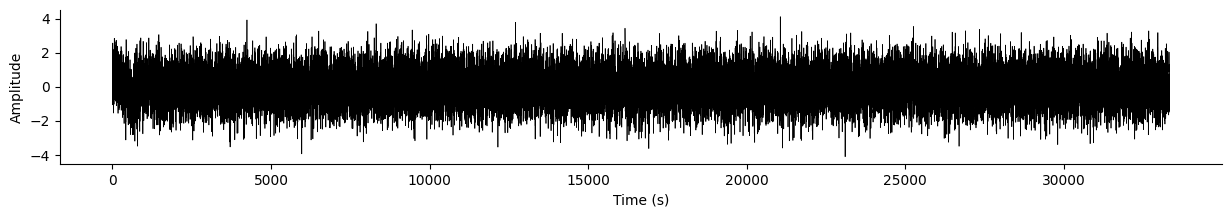

In [62]:
#Plot a single trace (demodulated)

fig, ax = plt.subplots(figsize=(15,2))

ax.plot(trace, 'k', lw=0.5)
ax.set(xlabel='Time (s)', ylabel='Amplitude')
sns.despine()

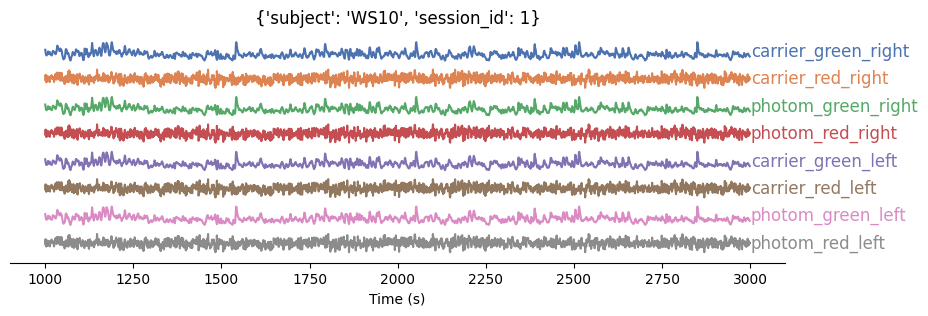

In [63]:
# Plot all photometry traces during the session
query = photometry.FiberPhotometry.DemodulatedTrace & session_key
traces = query.fetch("trace_name", "emission_color", "hemisphere", "trace", as_dict=True)

i= 8
inc_height= -1.5
window_start = 1000 
window_stop = 3000
n_colors = len(query)
fig, ax = plt.subplots(figsize=(10, 3))
sns.set_palette('deep', n_colors)

for j, trace in enumerate(traces):
    name = '_'.join([trace["trace_name"], trace["emission_color"], trace["hemisphere"]])
    ax.plot(pp.normalize(pd.DataFrame(trace["trace"]), window=500)[window_start:window_stop] + i, 
            label=name)
    i += inc_height
    ax.text(x=window_stop + 2, y=i - inc_height, s=name, fontsize=12, va="bottom", color=sns.color_palette()[j])
    
ax.set_title(f"{session_key}")
ax.set_xlabel("Time (s)")
ax.set_yticks([])
sns.despine(left=True)

#### We can then take a look at the event-related photometry traces.

In [64]:
# view the names of your defined events
event.EventType & session_key

event_type,event_type_description
centerport,
centerport_end,
choice,
cue_end,
cue_start,
ENL_end,
ENL_start,
leftport,
leftport_end,
left_lick,


In [65]:
# Behavioral events during the session
event.Event & session_key

subject,session_id,event_type,event_start_time (second) relative to recording start,event_end_time (second) relative to recording start
WS10,1,centerport,0.972,nan
WS10,1,centerport,15.39,nan
WS10,1,centerport,20.79,nan
WS10,1,centerport,24.624,nan
WS10,1,centerport,29.214,nan
WS10,1,centerport,36.774,nan
WS10,1,centerport,42.606,nan
WS10,1,centerport,42.768,nan
WS10,1,centerport,43.092,nan
WS10,1,centerport,43.2,nan


In [66]:
#fetch your event types and/or call particular ones
event_types = (event.EventType & session_key).fetch("event_type")

In [67]:
# Plot peri-event photometry traces per hemisphere
event_types = (event.EventType & session_key).fetch("event_type")
trace_name = "photom"
emission_color = "red"

restr = {
    "trace_name": trace_name,
    "emission_color": emission_color,
    "hemisphere": "right"
}
query = photometry.FiberPhotometrySynced.SyncedTrace() & session_key & restr
traces = query.fetch("trace")

time_buffer = (1, 3)  # before and after each event
sample_rate = photometry.FiberPhotometry.DemodulatedTrace.fetch("demod_sample_rate")[0]
timestamps = np.array((photometry.FiberPhotometrySynced & session_key).fetch1("timestamps"))
timestamps = timestamps / sample_rate


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (439,) + inhomogeneous part.

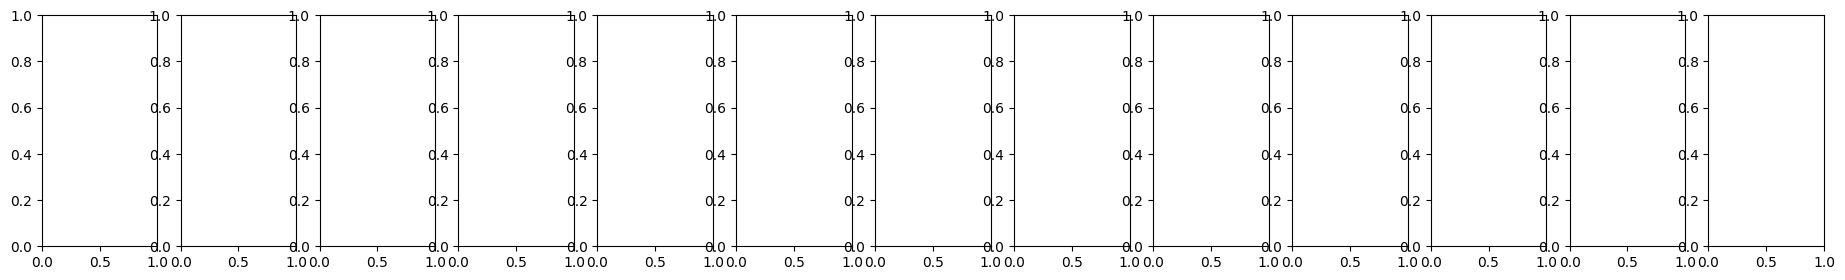

In [68]:
fig, axes = plt.subplots(1, len(event_types), figsize=(23, 3))
for ind, (event_type, ax) in enumerate(zip(event_types, axes)):

    event_traces = []  # Store traces for this event type

    for time, trace in zip(timestamps, traces):
        desired_length = len(trace)
        new_timestamps = np.linspace(timestamps[0], timestamps[-1], desired_length)
        df = pd.DataFrame({"timestamps": new_timestamps, "photometry_trace": trace})

        # Query the event_start_time for the respective event type
        query = event.Event & session_key & f"event_type='{event_type}'"
        event_ts = query.fetch("event_start_time")

        # Iterate over each event time
        for ts in event_ts:
            # Find the corresponding index in the trace for the event time
            index = np.searchsorted(df["timestamps"], ts)

            # Define the time window around the event
            window_start = index - int(time_buffer[0])
            window_end = index + int(time_buffer[1]) + 1

            # Extract the peri-event window
            peri_event_window = df.iloc[window_start:window_end]

            event_traces.append(peri_event_window["photometry_trace"].values)
    if event_traces:  # Check if there are event traces
        event_traces = np.array(event_traces)  # trial x time

        # Compute the mean and standard error of the event traces
        mean_trace = np.mean(event_traces, axis=0)
        sem_trace = sem(event_traces, axis=0)
        mean_trace_timestamps = np.arange(len(mean_trace))

        # Plot the mean trace with standard error
        ax.plot(mean_trace_timestamps, mean_trace, label=event_type, lw=2)
        ax.fill_between(mean_trace_timestamps, mean_trace - sem_trace, mean_trace + sem_trace, alpha=0.3)

    ax.axvline(x=0, linewidth=0.5, ls='--')
    if ind == 0:
        ax.set_ylabel("Trace Name", fontsize=15)
    ax.set(xlabel='Time (s)', title=event_type)
    sns.despine()

plt.legend(loc='center left', bbox_to_anchor=(0.98, 0.5))
plt.show()
